# *RFM (Recency, Frequency, Monetary Value)*
- [***Investopedia***](https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp)

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

- **Recency:** How recently a customer has made a purchase
- **Frequency:** How often a customer makes a purchase
- **Monetary Value:** How much money a customer spends on purchases

*RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.*

- Recency, frequency, monetary value (RFM) a marketing analysis tool used to identify a firm's best clients, based on the nature of their spending habits.
- An RFM analysis evaluates clients and customers by scoring them in three categories: how recently they've made a purchase, how often they buy, and the size of their purchases.
- RFM analysis helps firms reasonably predict which customers are more likely to make purchases again in the future, how much revenue comes from new (versus repeat clients), and how to turn occasional buyers into habitual ones.
'
[ ### The Significance of Recency, Frequency, Monetary Value
RFM analysis allows a comparison between potential contributors or clients. It gives organizations a sense of how much revenue comes from repeat customers (versus new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.
 
Despite the useful information that is acquired through RFM analysis, firms must take into consideration that even the best customers will not want to be over-solicited, and the lower-ranking customers may be cultivated with additional marketing efforts. It works as a snapshot of the clientele and as a tool to prioritize nurturing, but it should not be taken as a license to simply do more of the same-old, same-old sales techniques.

**Steps to make RFM Clusters -**:
- Calculate recency, frequency and monetary value
    - Divide into three segments: 
        - Low Value
        - Mid Value
        - High Value
- Create cluster for each attribute
- Combining the clusters from attributes into one

In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
data = pd.read_csv('data/merged_data.csv')
customer_transactions = pd.read_csv('data/customers_transactions.csv')

In [3]:
# converting `became member on` to datetime
data.became_member_on = pd.to_datetime(data.became_member_on)
customer_transactions.became_member_on = pd.to_datetime(data.became_member_on)

In [4]:
data.sample(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
180825,38e17daa16b5474bb8d5de4b69e207b3,transaction,24,NaN,0,21.25,male,64,2016-08-31,108000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208657,c754e0a81d6b4b66a7a4f8477f96f29a,transaction,24,NaN,0,10.66,female,39,2015-07-31,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195747,28e8c5a9884e4e6d988d19c59c51c4e2,transaction,5,NaN,0,4.20,male,42,2015-02-01,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272179,a890595e6dbc46b2a2554042f73d9202,offer completed,14,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,0.00,male,58,2014-04-22,68000.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
77907,95938d23ef38461fb14fad9a4ecc9d75,offer completed,22,2906b810c7d4411798c6938adc9daaa5,2,0.00,female,52,2016-05-15,83000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0


In [5]:
customer_transactions.head(5)

,customer_id,time_received,offer_id,reward,gender,age,became_member_on,income,difficulty,duration,...,total_spent_non_offer,profit,total_spent,num_bogo_completed,num_discount_completed,num_informational_completed,successful_offers,non_successful_offers,completed_offer,segment
0,0009655768c64bdeb2e877511632db8f,24,2906b810c7d4411798c6938adc9daaa5,2.0,male,33,2017-05-09,72000.0,10.0,7.0,...,69.20,67.20,69.20,1.0,2.0,2.0,3.0,2,1,NVC
1,0009655768c64bdeb2e877511632db8f,14,3f207df678b143eea3cee63160fa8bed,0.0,male,33,2017-05-09,72000.0,0.0,4.0,...,0.00,8.57,8.57,1.0,2.0,2.0,3.0,2,1,VC
2,0009655768c64bdeb2e877511632db8f,7,5a8bc65990b245e5a138643cd4eb9837,0.0,male,33,2017-05-09,72000.0,0.0,3.0,...,0.00,22.16,22.16,1.0,2.0,2.0,3.0,2,1,VC
3,0009655768c64bdeb2e877511632db8f,17,f19421c1d4aa40978ebb69ca19b0e20d,5.0,male,33,2017-05-09,72000.0,5.0,5.0,...,22.68,17.68,22.68,1.0,2.0,2.0,3.0,2,1,NVC
4,0009655768c64bdeb2e877511632db8f,21,fafdcd668e3743c1bb461111dcafc2a4,2.0,male,33,2017-05-09,72000.0,10.0,10.0,...,0.00,94.87,96.87,1.0,2.0,2.0,3.0,2,1,VC


In [6]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  66501 non-null  object        
 1   time_received                66501 non-null  int64         
 2   offer_id                     66501 non-null  object        
 3   reward                       66501 non-null  float64       
 4   gender                       66501 non-null  object        
 5   age                          66501 non-null  int64         
 6   became_member_on             66501 non-null  datetime64[ns]
 7   income                       66501 non-null  float64       
 8   difficulty                   66501 non-null  float64       
 9   duration                     66501 non-null  float64       
 10  offer_type                   66501 non-null  object        
 11  email                        66501 non-nu

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       272762 non-null  object        
 1   event             272762 non-null  object        
 2   test_day          272762 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   reward            272762 non-null  int64         
 5   amount            272762 non-null  float64       
 6   gender            272762 non-null  object        
 7   age               272762 non-null  int64         
 8   became_member_on  272762 non-null  datetime64[ns]
 9   income            272762 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  object        
 13  email             148805 non-null  float64       
 14  mobi

## Recency

The more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases. Compared with customers who have not bought from the business in months or even longer periods, the likelihood of engaging in future transactions with recent customers is arguably higher.

Such information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs. In an effort not to overlook lapsed customers, marketing efforts could be made to remind them that it has been a while since their last transaction while offering them an incentive to rekindle their patronage.

In [8]:
# Since, we only need data for transactions
transactions = data[data.event == 'transaction']

In [9]:
transactions.head()

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,5,NaN,0,19.89,female,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,6,NaN,0,17.78,female,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,78afa995795e4d85b5d9ceeca43f5fef,transaction,9,NaN,0,19.67,female,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,78afa995795e4d85b5d9ceeca43f5fef,transaction,10,NaN,0,29.72,female,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,78afa995795e4d85b5d9ceeca43f5fef,transaction,15,NaN,0,23.93,female,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
transactions.groupby('customer_id').test_day.max().reset_index()

,customer_id,test_day
0,0009655768c64bdeb2e877511632db8f,29
1,0011e0d4e6b944f998e987f904e8c1e5,27
2,0020c2b971eb4e9188eac86d93036a77,29
3,0020ccbbb6d84e358d3414a3ff76cffd,28
4,003d66b6608740288d6cc97a6903f4f0,29
...,...,...
14487,fff3ba4757bd42088c044ca26d73817a,23
14488,fff7576017104bcc8677a8d63322b5e1,29
14489,fff8957ea8b240a6b5e634b6ee8eafcf,24
14490,fffad4f4828548d1b5583907f2e9906b,28


In [11]:
# calculating recency


def recency(transactions):
    max_purchase_dates = transactions.groupby(
        'customer_id').test_day.max().reset_index()
    max_purchase_dates.columns = ['customer_id', 'max_purchase_date']
    recency = max_purchase_dates.max_purchase_date.max(
    ) - max_purchase_dates.max_purchase_date
    max_purchase_dates.insert(2, 'recency', recency)

    return max_purchase_dates

In [12]:
recency_data = recency(transactions)

Text(0, 0.5, 'Customers Count')

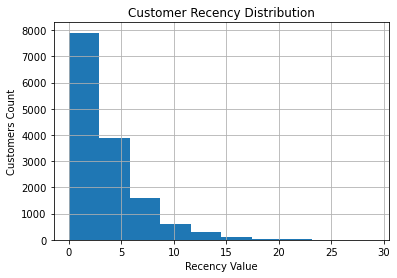

In [13]:
# Checking recency distribution
recency_data.recency.hist()
plt.title('Customer Recency Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Customers Count')

- **Right skewed data means most of the transactions are recent.**
- **Creating recency clusters using K-Means elbow method.**

Text(0.5, 0, 'Number of clusers')

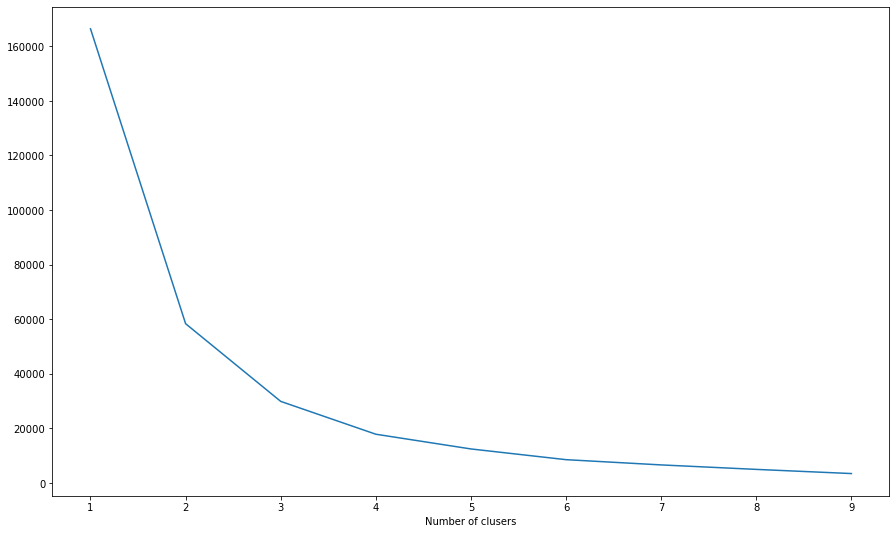

In [14]:
inertias = {}

customer_recency = recency_data[['recency']].copy()
customer_recency.insert(1, 'clusters', [0]*customer_recency.shape[0])

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(customer_recency)
    customer_recency["clusters"] = kmeans.labels_
    inertias[k] = kmeans.inertia_

plt.figure(figsize=(15, 9))
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.xlabel("Number of clusers")

In [15]:
inertias

{1: 166405.40022080144,
 2: 58365.12411370341,
 3: 29900.911834868806,
 4: 17870.49154828138,
 5: 12475.691683850275,
 6: 8548.629803083997,
 7: 6627.925060326091,
 8: 4986.918938248996,
 9: 3459.414262994397}

***Allocating clusters***

In [16]:
def create_clusters(data, target):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(data[[target]])
    cluster_field_name = f'{target}_cluster'
    data[cluster_field_name] = kmeans.predict(data[[target]])

    new_data = data.groupby(cluster_field_name)[target].mean().reset_index()
    new_data = new_data.sort_values(
        by=target, ascending=False).reset_index(drop=True)
    new_data['index'] = new_data.index

    final_data = pd.merge(
        data, new_data[[cluster_field_name, 'index']], on=cluster_field_name)
    final_data = final_data.drop([cluster_field_name], axis=1)
    final_data = final_data.rename(columns={'index': cluster_field_name})

    return final_data

In [17]:
clusterd_customer_recency = create_clusters(recency_data, 'recency')
clusterd_customer_recency.head(5)

,customer_id,max_purchase_date,recency,recency_cluster
0,0009655768c64bdeb2e877511632db8f,29,0,4
1,0020c2b971eb4e9188eac86d93036a77,29,0,4
2,0020ccbbb6d84e358d3414a3ff76cffd,28,1,4
3,003d66b6608740288d6cc97a6903f4f0,29,0,4
4,00426fe3ffde4c6b9cb9ad6d077a13ea,29,0,4


In [18]:
clusterd_customer_recency.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,178.0,17.477528,2.926993,15.0,15.0,16.5,19.0,29.0
1,915.0,10.794536,1.588861,9.0,9.0,10.0,12.0,14.0
2,2537.0,6.137170,1.071252,5.0,5.0,6.0,7.0,8.0
3,5077.0,2.834745,0.800949,2.0,2.0,3.0,4.0,4.0
4,5785.0,0.461193,0.498535,0.0,0.0,0.0,1.0,1.0


***As, we can see, there are many customers in cluster with about 0 mean with higher recency in cluster with less number of customers.***

`Recency 0 means recent buyer.`

## Frequency
The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment or replacement. If the purchase cycle can be predicted, for example when a customer needs to buy new groceries, marketing efforts could be directed towards reminding them to visit the business when items such as eggs or milk have been depleted.

In [19]:
def frequency(data):
    transaction_frequency = data.groupby(
        'customer_id').amount.count().reset_index()
    transaction_frequency.columns = ['customer_id', 'frequency']

    return transaction_frequency

In [20]:
customer_frequency = frequency(transactions)
customer_frequency.sample(5)

,customer_id,frequency
11283,c6f74b2f0d954fd082fe5ab3d6e1f880,6
3224,397e33ebb12e4a3aa1e8ec840c84d104,20
7072,7ca8a3cfaa7a4628a9523502c8af804f,4
2135,26df95a49cbd48f3b18bfbb31d240c7c,2
7410,82cc7adbd8ae46348273e75f0025288a,7


Text(0, 0.5, 'Customers Count')

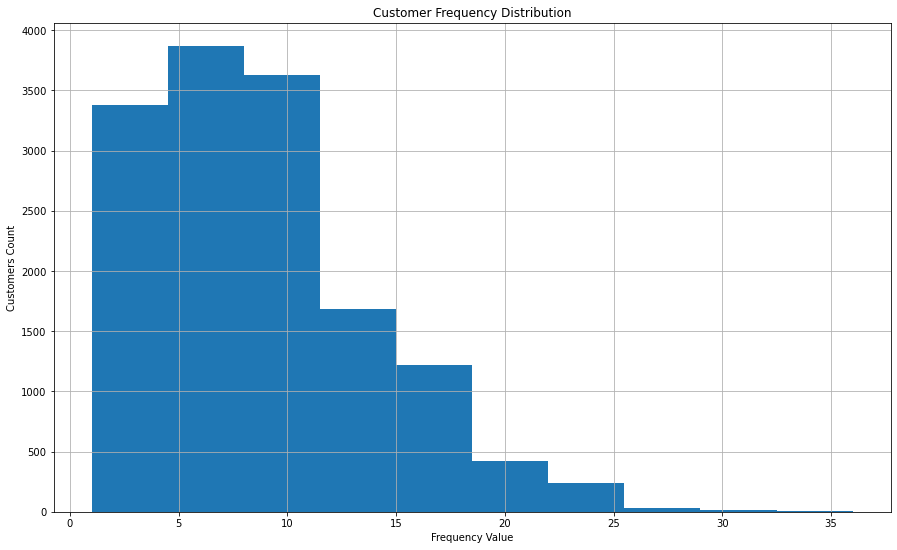

In [21]:
customer_frequency.frequency.hist(figsize=(15, 9))
plt.title('Customer Frequency Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Customers Count')

In [22]:
customer_frequency.describe()

,frequency
count,14492.000000
mean,8.553478
std,5.082696
min,1.000000
25%,5.000000
50%,7.000000
75%,11.000000
max,36.000000


In [23]:
clustered_customer_frequency = create_clusters(customer_frequency, 'frequency')
clustered_customer_frequency.sample(5)

,customer_id,frequency,frequency_cluster
12135,8242c1a47ab04f29b1bcac3a3722d568,4,4
8256,0c4469885bf54976a3a595ec6acc3847,15,1
13125,cca9c05376d54bceaab7d63838866435,3,4
3127,9d9762e2f526402aa214e18be86ecb0f,7,3
1678,54890f68699049c2a04d415abc25e717,7,3


In [24]:
clustered_customer_frequency.groupby('frequency_cluster')[
    'frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,708.0,21.516949,2.629610,19.0,20.0,21.0,23.0,36.0
1,2263.0,14.987185,1.672134,13.0,13.0,15.0,16.0,18.0
2,3139.0,10.371456,1.092719,9.0,9.0,10.0,11.0,12.0
3,5004.0,6.414468,1.115407,5.0,5.0,6.0,7.0,8.0
4,3378.0,3.005625,0.985668,1.0,2.0,3.0,4.0,4.0


***As, we can lower the count higher the mean number of frequency.***

## Monetary Value
Monetary value stems from the lucrativeness of expenditures the customer makes with the business during their transactions. A natural inclination is to put more emphasis on encouraging customers who spend the most money to continue to do so. While this can produce a better return on investment in marketing and customer service, it also runs the risk of alienating customers who have been consistent but have not spent as much with each transaction.

In [25]:
def revenue(data):
    transaction_revenue = transactions.groupby(
        'customer_id').amount.sum().reset_index()
    transaction_revenue.columns = ['customer_id', 'revenue']

    return transaction_revenue

In [26]:
customers_revenue = revenue(transactions)
customers_revenue.sample(5)

,customer_id,revenue
7919,8b9d3f738e7e499b9e820de07c16bc62,19.62
9889,ace4a7611da040748d1722cda25b6280,15.33
5394,5f18c5754dc04baaa1267c823f877a85,5.40
8258,91500f8c94464be0ae271ab021aea6b9,16.23
6224,6dba14f698ae4030ab7354cd5cfe7119,301.29


Text(0, 0.5, 'Customers Count')

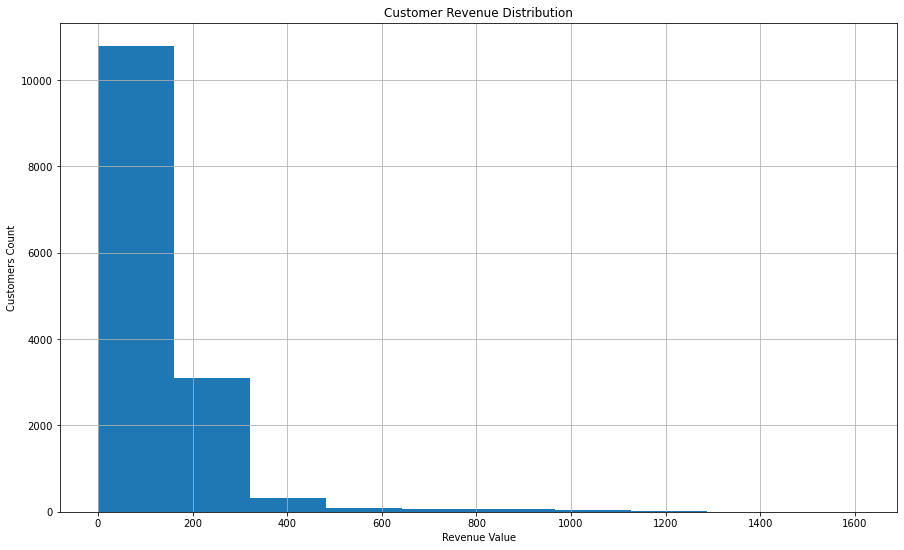

In [27]:
customers_revenue.revenue.hist(figsize=(15, 9))
plt.title('Customer Revenue Distribution')
plt.xlabel('Revenue Value')
plt.ylabel('Customers Count')

In [28]:
customers_revenue.describe()

,revenue
count,14492.000000
mean,119.717251
std,130.219435
min,0.150000
25%,34.187500
50%,89.860000
75%,162.750000
max,1608.690000


In [29]:
clusterd_customers_revenue = create_clusters(customers_revenue, 'revenue')
clusterd_customers_revenue.sample(5)

,customer_id,revenue,revenue_cluster
12804,8b7d6291add449f7812b3435e77bc304,222.62,2
1235,43b53afc1f254f16962cedd850c030b6,152.14,3
3221,af76332f99e34945ac7e4880c74f7c91,161.56,3
12646,7b3aaef71abf4aa0b4e9c920c7f1940e,275.20,2
1526,534041374d564f06ad470c46a851464a,132.18,3


In [30]:
clusterd_customers_revenue.groupby('revenue_cluster')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
revenue_cluster,,,,,,,,
0,184.0,899.495380,169.327888,664.05,766.3825,865.875,1003.8025,1608.69
1,389.0,426.953728,92.414202,328.04,354.1800,389.070,492.3400,653.73
2,2551.0,228.476425,39.413534,176.60,195.0400,219.970,255.2750,326.83
3,4649.0,125.154302,27.143212,80.23,101.6700,124.030,147.9500,176.56
4,6719.0,35.520842,21.942209,0.15,16.5800,31.240,53.4350,80.20


***Lower the count higher the mean revenue.***

## *Combining RFM Clusters.*

In [31]:
# merging the dataframes
rfm_data = pd.merge(clusterd_customer_recency,
                    clusterd_customers_revenue, on='customer_id')
rfm_data = pd.merge(rfm_data, clustered_customer_frequency, on='customer_id')

In [32]:
rfm_data.sample(5)

,customer_id,max_purchase_date,recency,recency_cluster,revenue,revenue_cluster,frequency,frequency_cluster
9162,a8e87d9498de4635a3d0d6e23f24d235,27,2,3,88.32,3,6,3
6526,24e1795cb9894e078644210adf514d18,27,2,3,93.09,3,5,3
13262,f2ac47ad6a874a10b85490a42cb23d76,24,5,2,87.17,3,4,4
11208,2572edba34644161b70d0d0f0a4f08f8,21,8,2,188.62,2,8,3
6075,0e1c6bc99dc34d8d82d7a0048de8501e,25,4,3,14.76,4,4,4


### Calculating overall score.

We have to fix constraints to the attribute values depending on focus on attribute, i.e if we want monetary customer then we increase monetary constraint. We will use all three constraints as equal.

In [33]:
rfm_data['overall_score'] = rfm_data['recency_cluster'] + \
    rfm_data['frequency_cluster'] + rfm_data['revenue_cluster']

rfm_data.head()

,customer_id,max_purchase_date,recency,recency_cluster,revenue,revenue_cluster,frequency,frequency_cluster,overall_score
0,0009655768c64bdeb2e877511632db8f,29,0,4,127.60,3,8,3,10
1,0020c2b971eb4e9188eac86d93036a77,29,0,4,196.86,2,8,3,9
2,0020ccbbb6d84e358d3414a3ff76cffd,28,1,4,154.05,3,12,2,9
3,003d66b6608740288d6cc97a6903f4f0,29,0,4,48.34,4,18,1,9
4,00426fe3ffde4c6b9cb9ad6d077a13ea,29,0,4,68.51,4,17,1,9


In [34]:
rfm_data.groupby('overall_score')[['recency', 'frequency', 'revenue']].mean()

,recency,frequency,revenue
overall_score,,,
3,5.846154,16.153846,838.523077
4,4.051948,16.623377,641.337922
5,3.671141,15.677852,414.129597
6,3.302297,14.212817,295.428222
7,3.127707,12.741810,204.096297
8,4.002743,10.267490,131.010168
9,3.776159,7.925386,86.100044
10,2.833333,5.777083,62.533309
11,1.625150,4.548135,37.376637


In [35]:
rfm_data.groupby('overall_score')[['recency', 'frequency', 'revenue']].count()

,recency,frequency,revenue
overall_score,,,
3,13,13,13
4,77,77,77
5,298,298,298
6,827,827,827
7,1801,1801,1801
8,2916,2916,2916
9,3431,3431,3431
10,2880,2880,2880
11,1662,1662,1662


### Combining Segments.

In [36]:
rfm_data['RFM_segment'] = pd.qcut(rfm_data['overall_score'], 3, labels=[
    'Low-Value', 'Mid-Value', 'High-Value'])

rfm_data.sample(5)

,customer_id,max_purchase_date,recency,recency_cluster,revenue,revenue_cluster,frequency,frequency_cluster,overall_score,RFM_segment
9488,b914d62e1a024a63817296ee8edb84f5,26,3,3,57.97,4,21,0,7,Low-Value
1456,3fbd4946157c40da802c32ef55b52523,29,0,4,130.89,3,9,2,9,Mid-Value
2315,6626b0fcb1f5451b89c2011c9c01e186,28,1,4,270.03,2,15,1,7,Low-Value
7367,4d92b09622154b3e91408fc407d34aae,26,3,3,39.16,4,11,2,9,Mid-Value
4613,cc79b9f0e46840418fd61600a449e2d4,29,0,4,92.87,3,3,4,11,High-Value


In [37]:
rfm_data.describe()

,max_purchase_date,recency,recency_cluster,revenue,revenue_cluster,frequency,frequency_cluster,overall_score
count,14492.000000,14492.000000,14492.000000,14492.000000,14492.000000,14492.000000,14492.000000,14492.000000
mean,25.852194,3.147806,3.060999,119.717251,3.195832,8.553478,2.557618,8.814449
std,3.388711,3.388711,0.966275,130.219435,0.907199,5.082696,1.148215,1.641284
min,0.000000,0.000000,0.000000,0.150000,0.000000,1.000000,0.000000,3.000000
25%,24.000000,1.000000,2.000000,34.187500,3.000000,5.000000,2.000000,8.000000
50%,27.000000,2.000000,3.000000,89.860000,3.000000,7.000000,3.000000,9.000000
75%,28.000000,5.000000,4.000000,162.750000,4.000000,11.000000,3.000000,10.000000
max,29.000000,29.000000,4.000000,1608.690000,4.000000,36.000000,4.000000,12.000000


In [38]:
# checking for nulls
rfm_data.isna().sum()

customer_id          0
max_purchase_date    0
recency              0
recency_cluster      0
revenue              0
revenue_cluster      0
frequency            0
frequency_cluster    0
overall_score        0
RFM_segment          0
dtype: int64

In [39]:
rfm_data.duplicated().sum()

0

#### Merging data

In [40]:
final_customer_transaction_data = pd.merge(
    customer_transactions, rfm_data, on='customer_id')

In [41]:
final_customer_transaction_data.sample(5)

,customer_id,time_received,offer_id,reward,gender,age,became_member_on,income,difficulty,duration,...,segment,max_purchase_date,recency,recency_cluster,revenue,revenue_cluster,frequency,frequency_cluster,overall_score,RFM_segment
64661,fe8264108d5b4f198453bbb1fa7ca6c9,17,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,female,78,2018-01-01,93000.0,10.0,5.0,...,VC,25,4,3,225.55,2,8,3,8,Low-Value
51743,cb8291d29fcd482b8793aa18c970a71b,14,5a8bc65990b245e5a138643cd4eb9837,0.0,male,71,2017-08-16,31000.0,0.0,3.0,...,VC,26,3,3,19.82,4,7,3,10,Mid-Value
64416,fd77e2de07bc4c2bb93399f5d765198a,14,5a8bc65990b245e5a138643cd4eb9837,0.0,female,36,2014-08-12,70000.0,0.0,3.0,...,VC,26,3,3,184.75,2,9,2,7,Low-Value
10376,2aac0e21d07947ab9acdf09382590e4d,21,f19421c1d4aa40978ebb69ca19b0e20d,5.0,male,67,2017-11-18,75000.0,5.0,5.0,...,VC,26,3,3,69.09,4,16,1,8,Low-Value
1569,062bebd7d15a422aacfbe41412c1bbd5,24,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,male,51,2013-09-27,66000.0,7.0,7.0,...,VC,29,0,4,50.73,4,11,2,10,Mid-Value


In [42]:
final_customer_transaction_data.duplicated().sum()

0

In [43]:
final_customer_transaction_data.isna().sum()

customer_id                        0
time_received                      0
offer_id                           0
reward                             0
gender                             0
age                                0
became_member_on                   0
income                             0
difficulty                         0
duration                           0
offer_type                         0
email                              0
mobile                             0
social                             0
web                                0
end_time                           0
completed                          0
finish                             0
viewed                             0
success                            0
view_time                      19536
completed_not_viewed               0
total_spent_offer                  0
total_spent_non_offer              0
profit                             0
total_spent                        0
num_bogo_completed                 0
n

In [44]:
# filling view time with null values with 0
final_customer_transaction_data.view_time.fillna(value=0, inplace=True)

In [45]:
final_customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65020 entries, 0 to 65019
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  65020 non-null  object        
 1   time_received                65020 non-null  int64         
 2   offer_id                     65020 non-null  object        
 3   reward                       65020 non-null  float64       
 4   gender                       65020 non-null  object        
 5   age                          65020 non-null  int64         
 6   became_member_on             65020 non-null  datetime64[ns]
 7   income                       65020 non-null  float64       
 8   difficulty                   65020 non-null  float64       
 9   duration                     65020 non-null  float64       
 10  offer_type                   65020 non-null  object        
 11  email                        65020 non-nu

In [46]:
# storing to machine
final_customer_transaction_data.to_csv(
    'data/customers_transactions_offers_RFM.csv', index=None, header=True)

## Exploratory Analysis

In [47]:
color = sb.color_palette()[0]

In [48]:
eda_data = final_customer_transaction_data.copy()

In [49]:
def annoated_barplot(data, title, xlabel, ylabel, figsize=(15, 9), rotation=60):
    plt.figure(figsize=figsize)
    ax = data.plot.bar(color=color)
    ax = data.plot.bar(color=color)
    ax.set_title(title, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)

    # annoations
    for point in ax.patches:
        ax.annotate('{:.3f}'.format(point.get_height()), (point.get_x(
        ) * 1.003, point.get_height() * 1.01), size=9, rotation=rotation)

    return ax

In [50]:
eda_data.describe()

,time_received,reward,age,income,difficulty,duration,email,mobile,social,web,...,non_successful_offers,completed_offer,max_purchase_date,recency,recency_cluster,revenue,revenue_cluster,frequency,frequency_cluster,overall_score
count,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000,65020.0,65020.000000,65020.000000,65020.000000,...,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000,65020.000000
mean,13.860581,2.477468,54.277253,65179.913873,7.707936,6.504983,1.0,0.899216,0.599323,0.799262,...,2.530037,0.598447,25.903799,3.096201,3.075392,122.566612,3.174731,8.755383,2.513996,8.764119
std,8.188100,3.216633,17.448102,21625.459290,5.543645,2.204070,0.0,0.301045,0.490039,0.400556,...,1.540795,0.490216,3.358463,3.358463,0.959927,132.876258,0.919413,5.189873,1.163248,1.656898
min,0.000000,0.000000,18.000000,30000.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,1.000000,0.000000,3.000000
25%,7.000000,0.000000,42.000000,49000.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000,...,1.000000,0.000000,25.000000,1.000000,3.000000,35.017500,3.000000,5.000000,2.000000,8.000000
50%,17.000000,2.000000,55.000000,63000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,...,2.000000,1.000000,27.000000,2.000000,3.000000,91.920000,3.000000,8.000000,3.000000,9.000000
75%,21.000000,5.000000,66.000000,79000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,...,4.000000,1.000000,28.000000,4.000000,4.000000,167.262500,4.000000,12.000000,3.000000,10.000000
max,24.000000,10.000000,101.000000,120000.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,...,6.000000,1.000000,29.000000,29.000000,4.000000,1608.690000,4.000000,36.000000,4.000000,12.000000


### Univariate Exploration

***Customer Group Distribution***

In [51]:
eda_data.segment.value_counts()

VC      29629
VNC     15092
NVNC    11017
NVC      9282
Name: segment, dtype: int64

<AxesSubplot:title={'center':'Segment Distribution'}, xlabel='Customer Groups', ylabel='Group Count'>

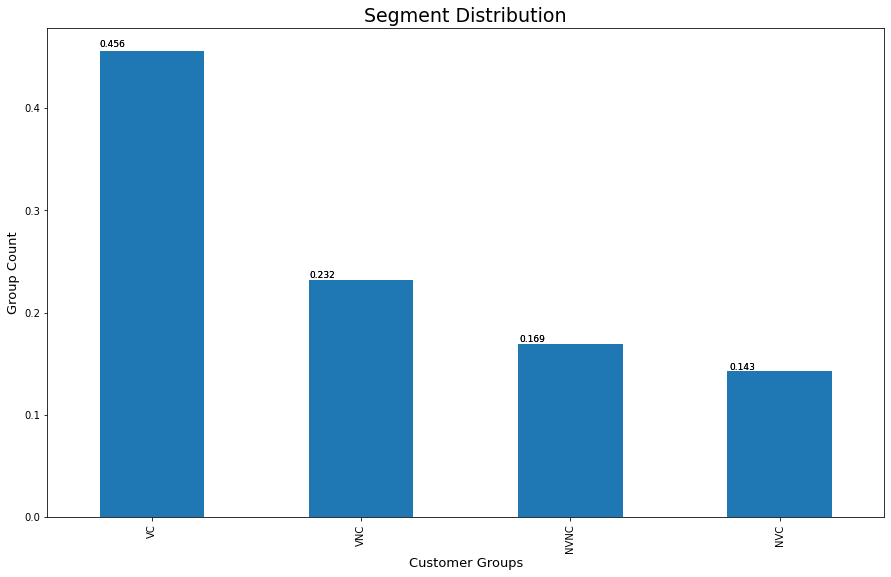

In [52]:
annoated_barplot(data=eda_data.segment.value_counts(
) / eda_data.shape[0], title='Segment Distribution', xlabel='Customer Groups', ylabel='Group Count', rotation=0)

- *45.6 % of the customers have viewed and completed the offer*
- *23.2 % of the customers have viewed the offer but not completed the offer.*
- *16.9 % of the customers have not viewed the offer and also didn't completed the offer.*
- *14.3 % of the customers have not viewed the offer but completed the offer.*

***RFM Segments***

In [53]:
eda_data.RFM_segment.value_counts()

Mid-Value     27586
Low-Value     27571
High-Value     9863
Name: RFM_segment, dtype: int64

<AxesSubplot:title={'center':'RFM Groups Distribution'}, xlabel='RFM Groups', ylabel='Group Count'>

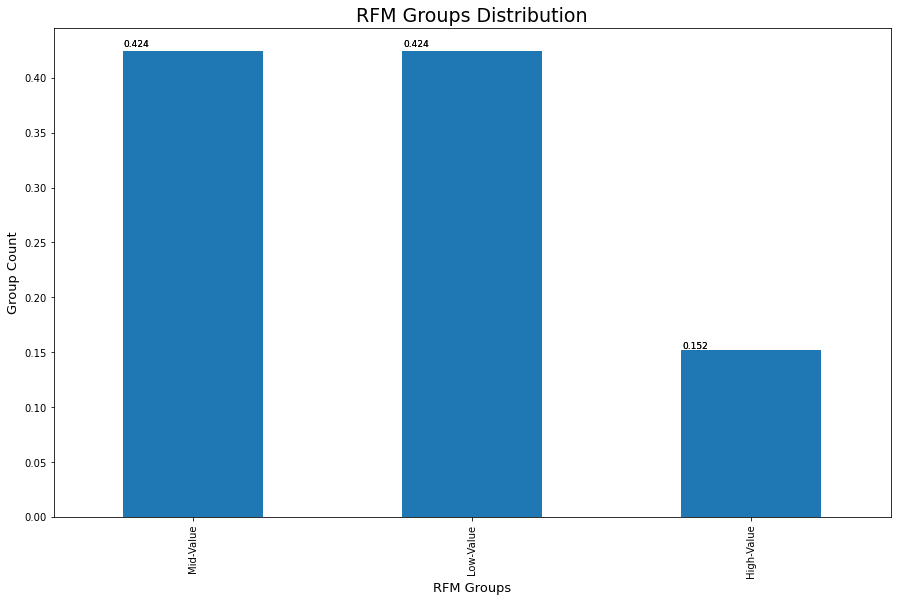

In [54]:
annoated_barplot(data=eda_data.RFM_segment.value_counts(
) / eda_data.shape[0], title='RFM Groups Distribution', xlabel='RFM Groups', ylabel='Group Count', rotation=0)

*About 46.8 % of customers belong to Low-Value segments depending on RFM.*

***Income Distribution***

Text(0.5, 1.0, 'Income Distribution')

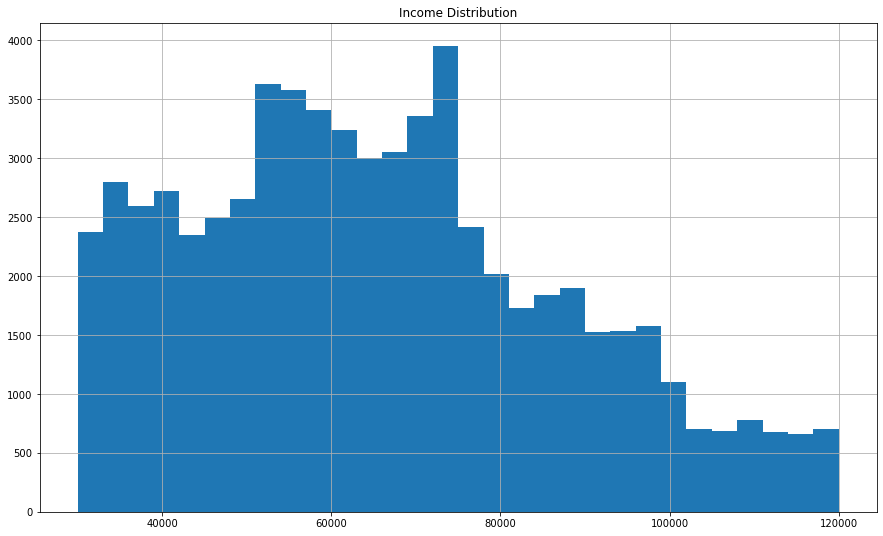

In [55]:
plt.figure(figsize=(15, 9))
eda_data.income.hist(bins=30)
plt.title('Income Distribution')

***Recency Distribution***

Text(0.5, 1.0, 'Recency Distribution')

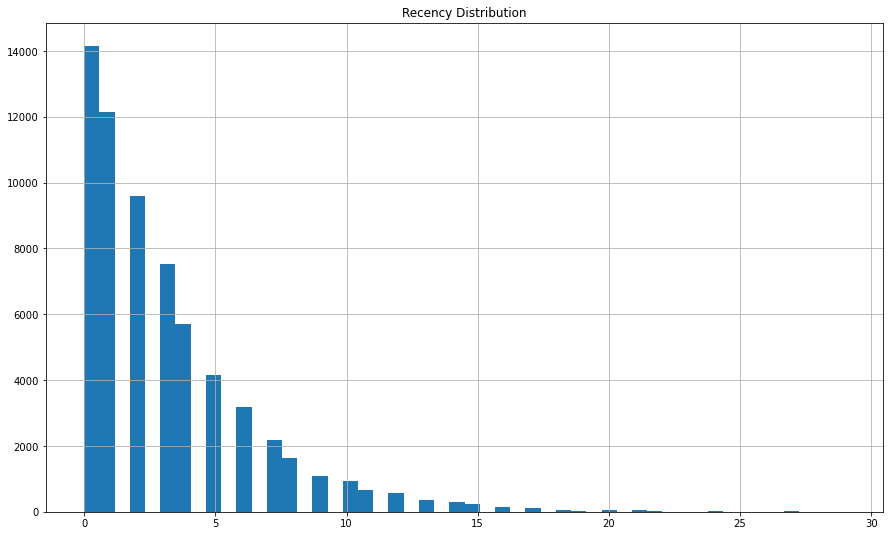

In [56]:
plt.figure(figsize=(15, 9))
eda_data.recency.hist(bins=50)
plt.title('Recency Distribution')

***Frequency Distribution***

Text(0.5, 1.0, 'Frequency Distribution')

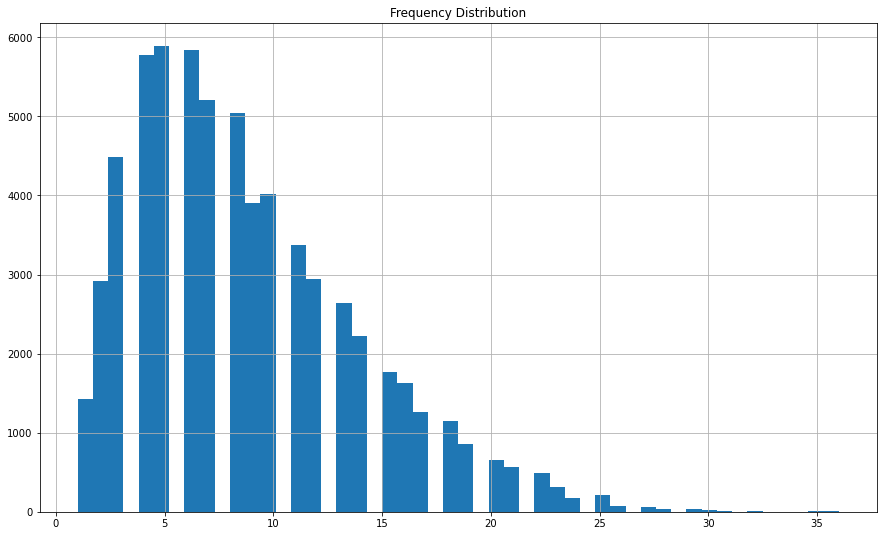

In [57]:
plt.figure(figsize=(15, 9))
eda_data.frequency.hist(bins=50)
plt.title('Frequency Distribution')

***Revenue Distribution***

Text(0.5, 1.0, 'Revenue Distribution')

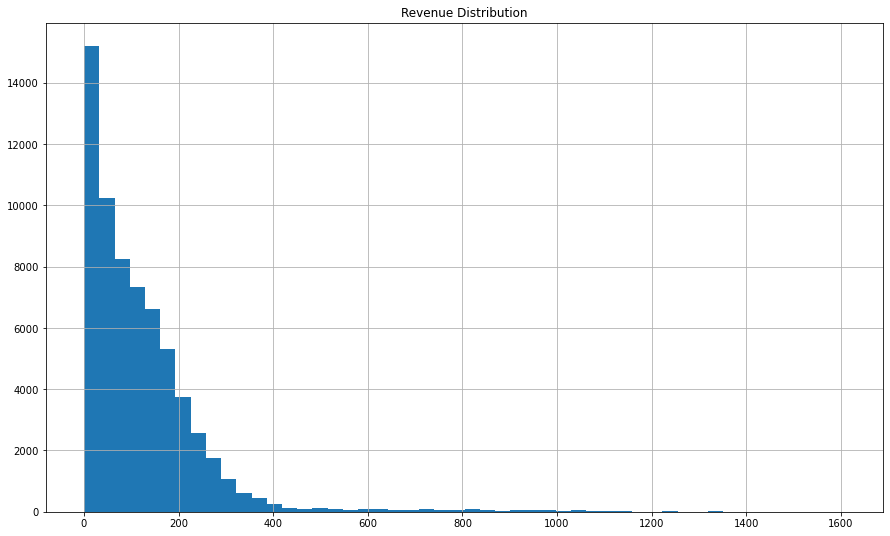

In [58]:
plt.figure(figsize=(15, 9))
eda_data.revenue.hist(bins=50)
plt.title('Revenue Distribution')

### Bivariate Exploration

In [59]:
rfm_temp = eda_data[['recency', 'frequency', 'revenue']]

***Recency vs Frequency***

Text(0.5, 1.0, 'Recency vs Frequency')

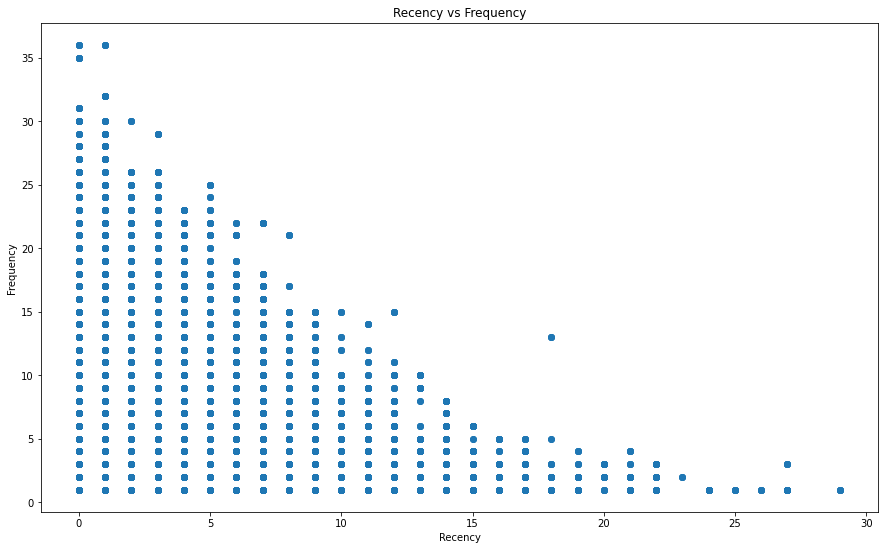

In [60]:
plt.figure(figsize=(15, 9))
plt.scatter(data=rfm_temp, x='recency', y='frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

***Recency vs Revenue***

Text(0.5, 1.0, 'Recency vs Revenue')

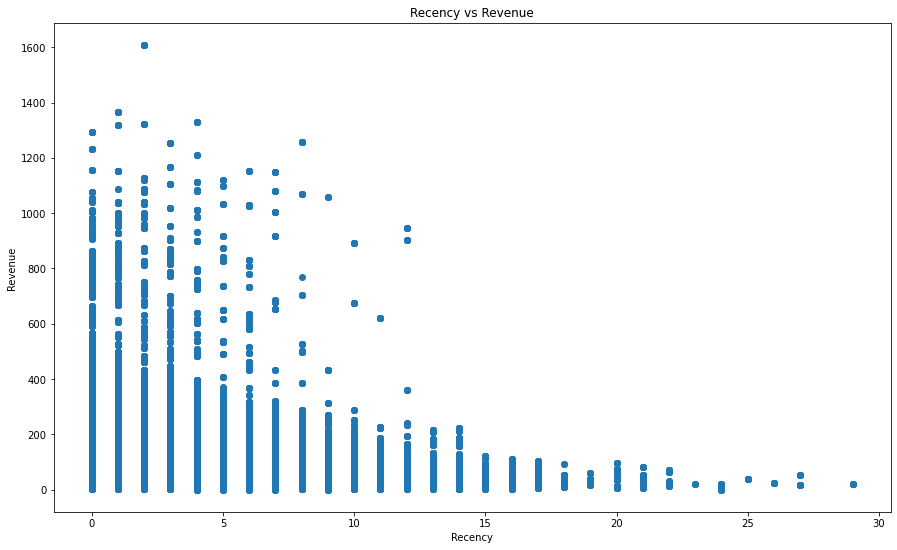

In [61]:
plt.figure(figsize=(15, 9))
plt.scatter(data=rfm_temp, x='recency', y='revenue')
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.title('Recency vs Revenue')

***Revenue vs Frequency***

Text(0.5, 1.0, 'Revenue vs Frequency')

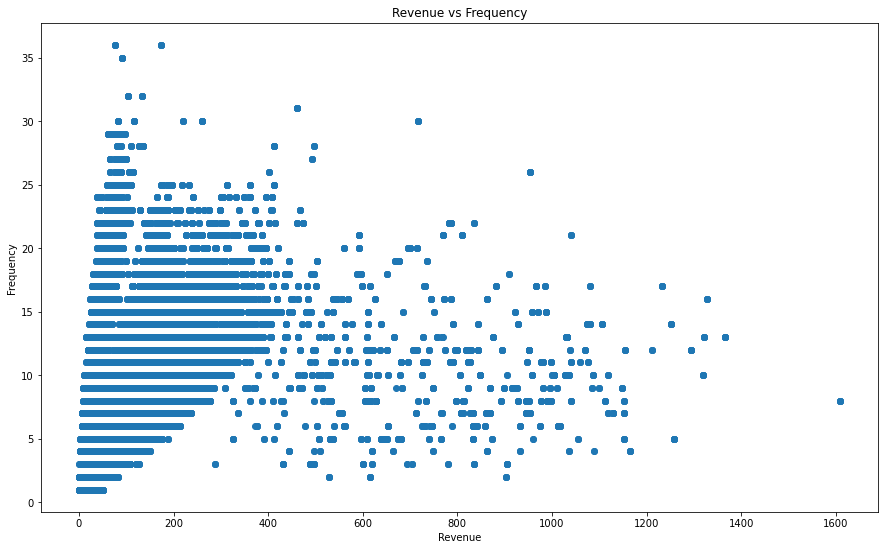

In [62]:
plt.figure(figsize=(15, 9))
plt.scatter(data=rfm_temp, x='revenue', y='frequency')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue vs Frequency')

<AxesSubplot:>

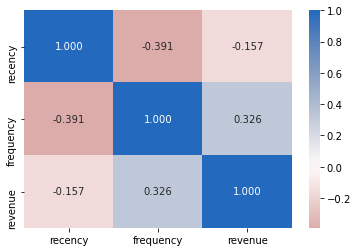

In [63]:
# No correlation
sb.heatmap(rfm_temp.corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)

***Age Group vs RFM Segment***

Text(0.5, 1.0, 'RFM segment versus customer age ')

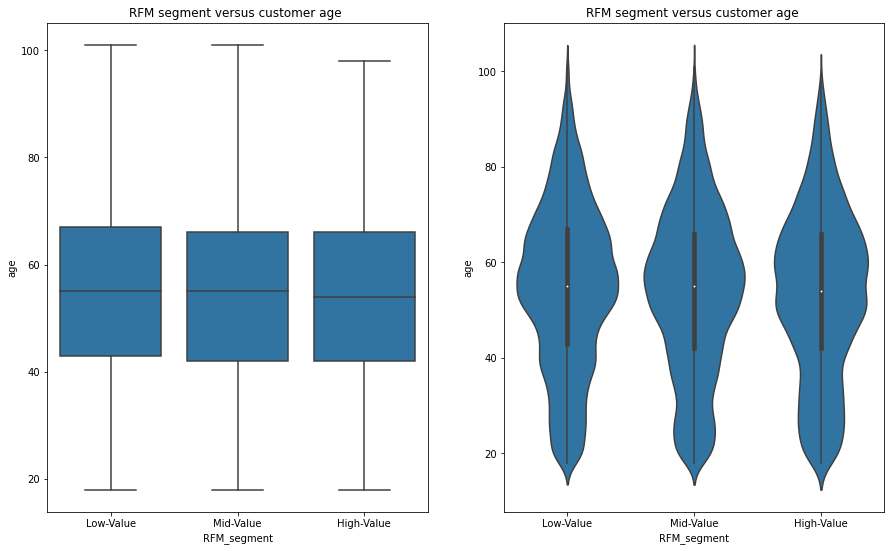

In [64]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)

sb.boxplot(data=eda_data, y='age', x='RFM_segment', color=color)
plt.title('RFM segment versus customer age ')

plt.subplot(1, 2, 2)

sb.violinplot(data=eda_data, y='age', x='RFM_segment', color=color)
plt.title('RFM segment versus customer age ')

In [65]:
eda_data.groupby('RFM_segment')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_segment,,,,,,,,
Low-Value,27571.0,54.662870,17.311949,18.0,43.0,55.0,67.0,101.0
Mid-Value,27586.0,54.211557,17.526755,18.0,42.0,55.0,66.0,101.0
High-Value,9863.0,53.383048,17.572894,18.0,42.0,54.0,66.0,98.0


*It seems like the age is not a factor in the RFM segment. The RFM segment with all values seem to contain the smallest age group from 42 - 67.*

***Income vs RFM Segment***

Text(0.5, 1.0, 'RFM segment versus customer income ')

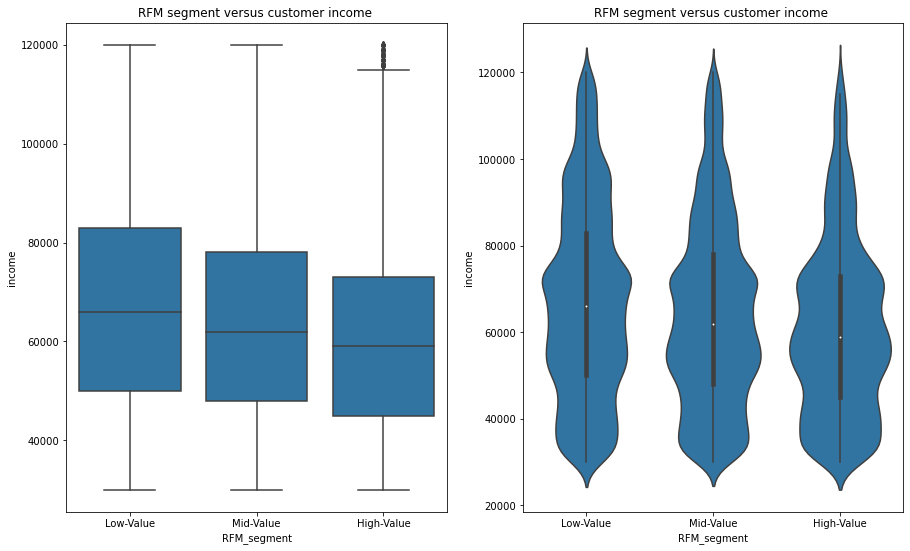

In [66]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)

sb.boxplot(data=eda_data, y='income', x='RFM_segment', color=color)
plt.title('RFM segment versus customer income ')

plt.subplot(1, 2, 2)

sb.violinplot(data=eda_data, y='income', x='RFM_segment', color=color)
plt.title('RFM segment versus customer income ')

In [67]:
eda_data.groupby('RFM_segment')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_segment,,,,,,,,
Low-Value,27571.0,67445.685684,22218.115694,30000.0,50000.0,66000.0,83000.0,120000.0
Mid-Value,27586.0,64389.074168,21291.565511,30000.0,48000.0,62000.0,78000.0,120000.0
High-Value,9863.0,61058.095914,20052.516002,30000.0,45000.0,59000.0,73000.0,120000.0


*Income seems to be a factor in RFM Segment.*

***Gender vs RFM Segment***

Text(0.5, 0.98, 'Gender vs RFM Segment')

<Figure size 1080x648 with 0 Axes>

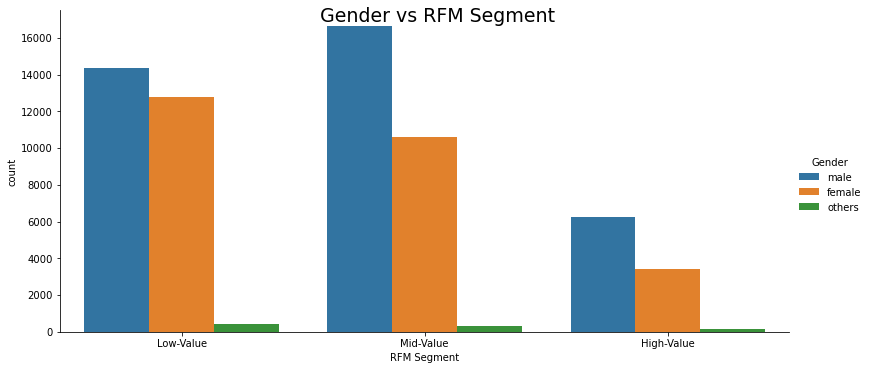

In [68]:
plt.figure(figsize=(15, 9))

graph = sb.catplot(data=eda_data, x='RFM_segment', hue="gender", hue_order=['male', 'female', 'others'],
                   kind='count', aspect=2.2)

graph.set_axis_labels("RFM Segment")
graph._legend.set_title('Gender')

graph.fig.suptitle('Gender vs RFM Segment', fontsize=19)

Text(0.5, 1.0, 'Gender Distribution across RFM segments')

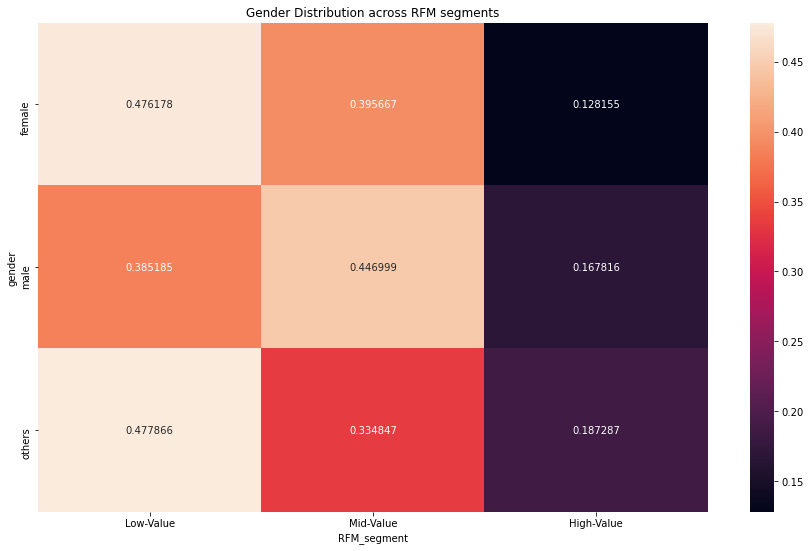

In [69]:
counts = eda_data.groupby(
    ['RFM_segment', 'gender']).size() / eda_data.groupby(['gender']).size()

counts = counts.reset_index(name='percentage')

counts = counts.pivot(
    index='gender', columns='RFM_segment', values='percentage')

plt.figure(figsize=(15, 9))
sb.heatmap(counts, annot=True, fmt='g')
plt.title('Gender Distribution across RFM segments')

*Since this dataset contain more males than females, normalizing the counts by the gender to compare the RFM segment should be done for the distribution.*

#### *Total Spent vs RFM segment*

(-10.0, 200.0)

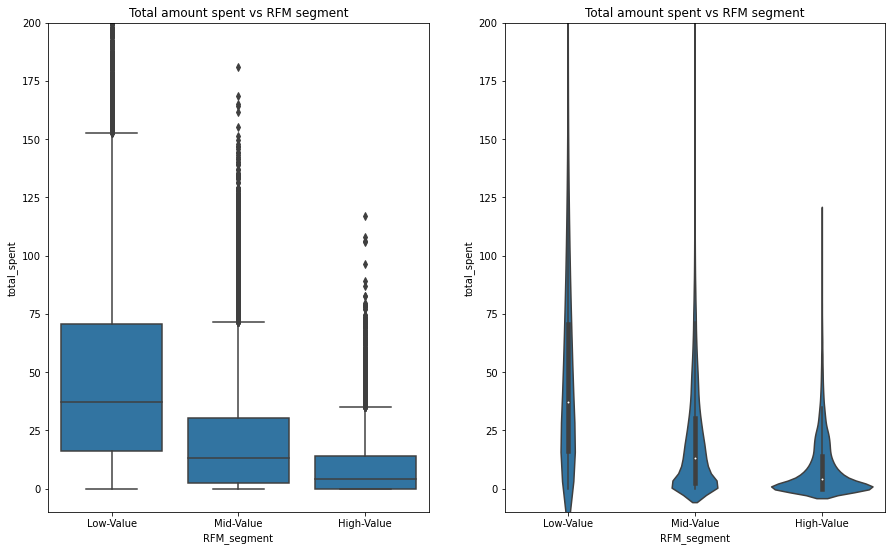

In [70]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
sb.boxplot(data=eda_data, y='total_spent',
           x='RFM_segment', color=color)
plt.title('Total amount spent vs RFM segment')
plt.ylim((-10, 200))

plt.subplot(1, 2, 2)
sb.violinplot(data=eda_data, y='total_spent',
              x='RFM_segment', color=color)
plt.title('Total amount spent vs RFM segment')
plt.ylim((-10, 200))

In [71]:
eda_data.groupby('RFM_segment')['total_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_segment,,,,,,,,
Low-Value,27571.0,55.729194,85.655599,0.0,15.995,37.250,70.590,1200.99
Mid-Value,27586.0,20.634412,23.316587,0.0,2.610,13.155,30.150,295.07
High-Value,9863.0,9.409548,12.948638,0.0,0.000,4.150,13.965,116.85


*Also, the above graph has lot of outliers.*
- The range of low-value is 25 to 69 dollars.
- The range of Mid-value is 2.7 to 31 dollars
- The range of high-value is 0 to 13 dollars.

#### *Profit vs RFM segment*

(-10.0, 200.0)

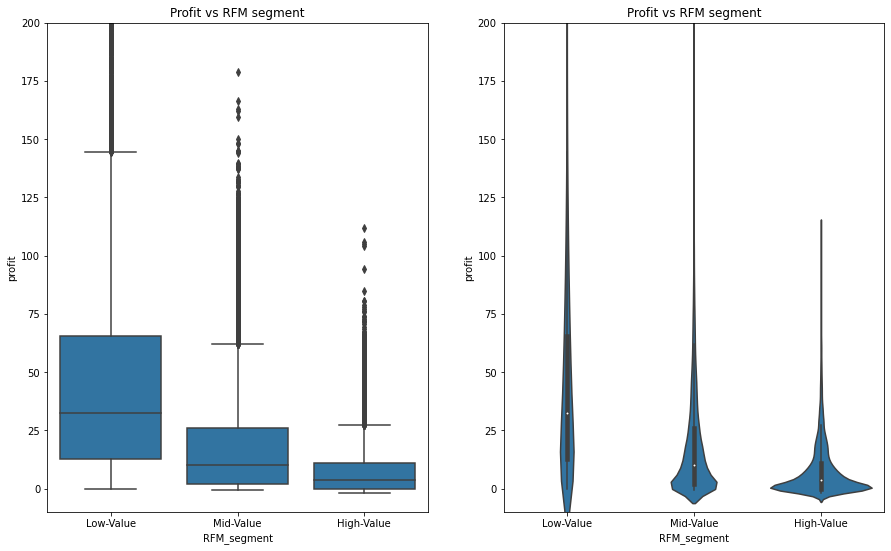

In [72]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
sb.boxplot(data=eda_data, y='profit',
           x='RFM_segment', color=color)
plt.title('Profit vs RFM segment')
plt.ylim((-10, 200))

plt.subplot(1, 2, 2)
sb.violinplot(data=eda_data, y='profit',
              x='RFM_segment', color=color)
plt.title('Profit vs RFM segment')
plt.ylim((-10, 200))

In [73]:
eda_data.groupby('RFM_segment')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_segment,,,,,,,,
Low-Value,27571.0,51.869330,84.929111,0.00,12.7200,32.58,65.415,1198.99
Mid-Value,27586.0,18.122786,21.941391,-0.78,1.9025,10.24,25.990,290.07
High-Value,9863.0,7.970237,11.605155,-2.05,0.0000,3.48,10.850,111.85


*Also, the above graph has lot of outliers.*
- The range of low-value is 15 to 69 dollars.
- The range of Mid-value is 0 to 30 dollars
- The range of high-value is 0 to 13.6 dollars.

#### *Customer Segments vs RFM clusters*

In [74]:
eda_data.groupby(['RFM_segment', 'segment']).size() / \
    eda_data.groupby(['RFM_segment']).size()

RFM_segment  segment
Low-Value    NVC        0.175547
             NVNC       0.109028
             VC         0.590439
             VNC        0.124986
Mid-Value    NVC        0.134054
             NVNC       0.197999
             VC         0.397702
             VNC        0.270246
High-Value   NVC        0.075433
             NVNC       0.258441
             VC         0.241205
             VNC        0.424921
dtype: float64

Text(0.5, 0.98, 'Customer Group vs RFM segment')

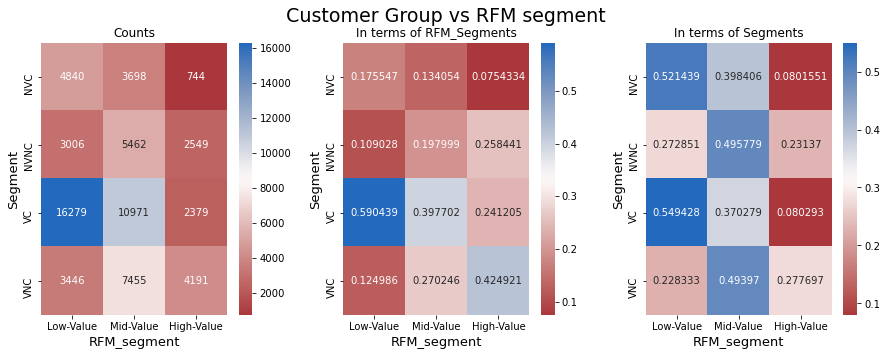

In [75]:
#  Segment (VC, VNC, NVC, NVNC) vs RFM

fig = plt.figure(figsize=(15, 5))

fig.subplots_adjust(hspace=.3, wspace=0.3)

plt.subplot(1, 3, 1)
counts = eda_data.groupby(['RFM_segment', 'segment']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(
    index='segment', columns='RFM_segment', values='count')

sb.heatmap(counts, annot=True, fmt='g', cmap='vlag_r')
plt.xlabel('RFM_segment', fontsize=13)
plt.ylabel('Segment', fontsize=13)
plt.title('Counts')

plt.subplot(1, 3, 2)
counts = eda_data.groupby(['RFM_segment', 'segment']).size(
) / eda_data.groupby(['RFM_segment']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(
    index='segment', columns='RFM_segment', values='count')

sb.heatmap(counts, annot=True, fmt='g', cmap='vlag_r')
plt.xlabel('RFM_segment', fontsize=13)
plt.ylabel('Segment', fontsize=13)
plt.title('In terms of RFM_Segments')


plt.subplot(1, 3, 3)
counts = eda_data.groupby(['RFM_segment', 'segment']).size(
) / eda_data.groupby(['segment']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(
    index='segment', columns='RFM_segment', values='count')

sb.heatmap(counts, annot=True, fmt='g', cmap='vlag_r')
plt.xlabel('RFM_segment', fontsize=13)
plt.ylabel('Segment', fontsize=13)
plt.title('In terms of Segments')


fig.suptitle('Customer Group vs RFM segment', fontsize=19)

In terms of the segments the RFM clusters are distributed as follows:

    - VC comprise of 56% of the Low value RFM clusters segments, followed by Mid value RFM clusters.
    - VNC is mostly in the Mid Value segment with 47% followed by 27.7% in the high value RFM cluster.
    - NVC comprise of 53% low value RFM clusters.
    - NVNC: highest portion comes from the mid value RFM cluster with 47% followed by high value with 29.6%.

Compring with respect to the RFM cluster:

    - Low value have 58% in the VC segment and similar percentages for NVC and VNC.
    - Mid Value RFM cluster comprise of 40% for the VC segment.

From above  observation, we can say low-value RFM-segment migh have more contribution with viewed and completed segment as people in low-segment has used offers more which results in less revenue and we gave equal importance to RFM attributes. High value segment consist more viewed but not completed and not viewed and not completed as from these people revenue will be high.

#### *Offers vs RFM_segments*

In [76]:
eda_data['num_completed_offers'] = eda_data['num_informational_completed'] + \
    eda_data['num_discount_completed'] + eda_data['num_bogo_completed']

Text(0.5, 0.98, 'Number of completed offers vs RFM segment')

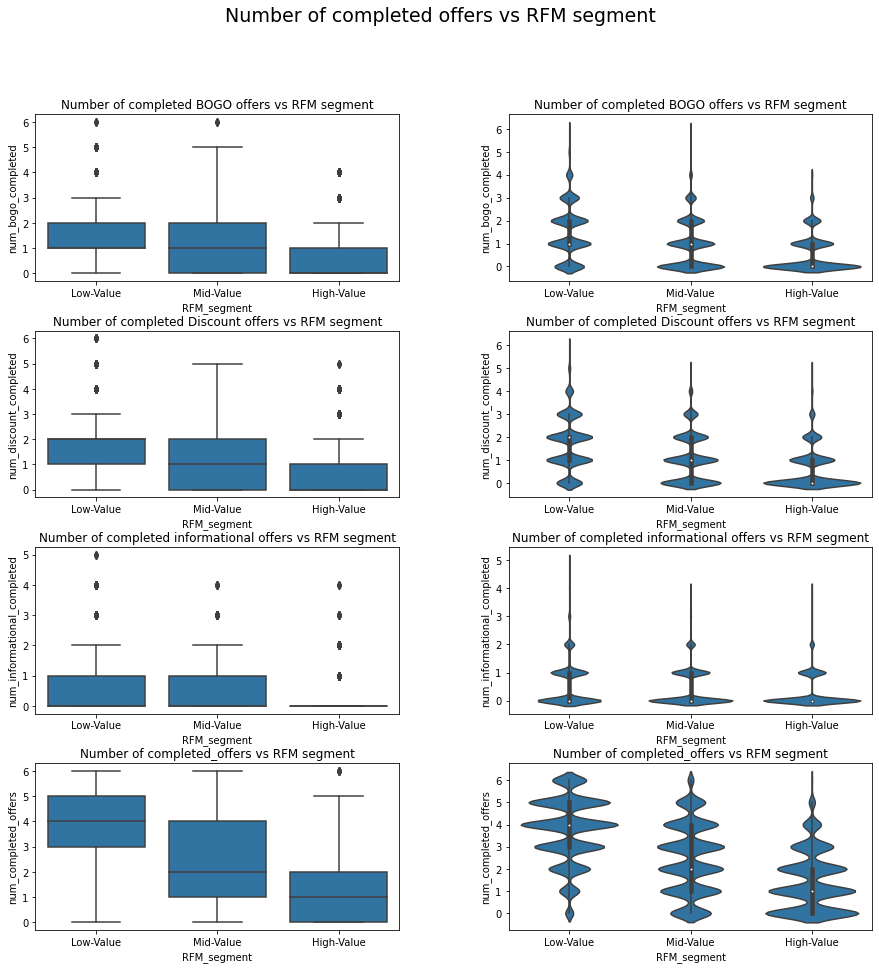

In [77]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=.3, wspace=0.3)

plt.subplot(4, 2, 1)
sb.boxplot(data=eda_data, y='num_bogo_completed',
           x='RFM_segment', color=color)
plt.title('Number of completed BOGO offers vs RFM segment')

plt.subplot(4, 2, 2)
sb.violinplot(data=eda_data, y='num_bogo_completed',
              x='RFM_segment', color=color)
plt.title('Number of completed BOGO offers vs RFM segment')

plt.subplot(4, 2, 3)
sb.boxplot(data=eda_data, y='num_discount_completed',
           x='RFM_segment', color=color)
plt.title('Number of completed Discount offers vs RFM segment')

plt.subplot(4, 2, 4)
sb.violinplot(data=eda_data, y='num_discount_completed',
              x='RFM_segment', color=color)
plt.title('Number of completed Discount offers vs RFM segment')

plt.subplot(4, 2, 5)
sb.boxplot(data=eda_data, y='num_informational_completed',
           x='RFM_segment', color=color)
plt.title('Number of completed informational offers vs RFM segment')

plt.subplot(4, 2, 6)
sb.violinplot(data=eda_data, y='num_informational_completed',
              x='RFM_segment', color=color)
plt.title('Number of completed informational offers vs RFM segment')

plt.subplot(4, 2, 7)
sb.boxplot(data=eda_data, y='num_completed_offers',
           x='RFM_segment', color=color)
plt.title('Number of completed_offers vs RFM segment')

plt.subplot(4, 2, 8)
sb.violinplot(data=eda_data, y='num_completed_offers',
              x='RFM_segment', color=color)
plt.title('Number of completed_offers vs RFM segment')

fig.suptitle('Number of completed offers vs RFM segment', fontsize=19)

#### Number of Offers completed by Low-value segment are higher than other segments especially than high value.

#### *Segment vs Income*

Text(0.5, 1.0, 'Income vs Customer Segment')

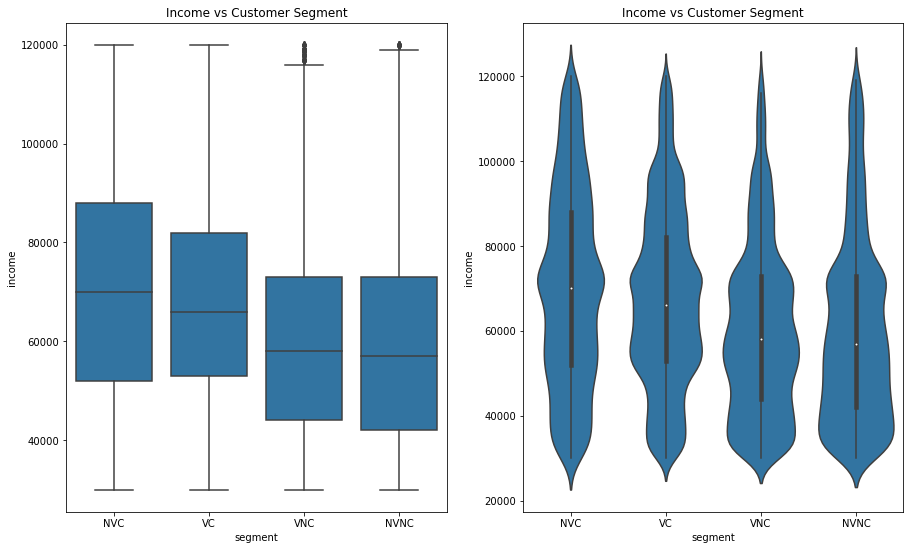

In [78]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
sb.boxplot(data=eda_data, y='income', x='segment', color=color)
plt.title('Income vs Customer Segment')

plt.subplot(1, 2, 2)
sb.violinplot(data=eda_data, y='income', x='segment', color=color)
plt.title('Income vs Customer Segment')

*We can see that for the highest income customers they are in NVC or VC group with the highest Q3. VNC group had the least upper limit for income.*

#### *Segment vs Total Spent*

Text(0.5, 1.0, 'Total Spent vs Customer Segment')

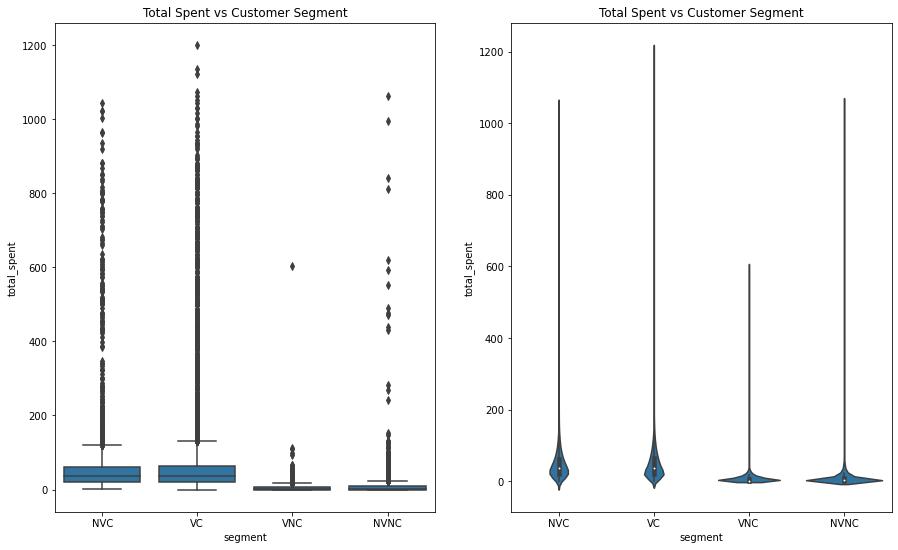

In [79]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
sb.boxplot(data=eda_data, y='total_spent', x='segment', color=color)
plt.title('Total Spent vs Customer Segment')

plt.subplot(1, 2, 2)
sb.violinplot(data=eda_data, y='total_spent', x='segment', color=color)
plt.title('Total Spent vs Customer Segment')

#### *Gender vs Segment*

Text(0.5, 1.0, 'Gender Distribution across segments')

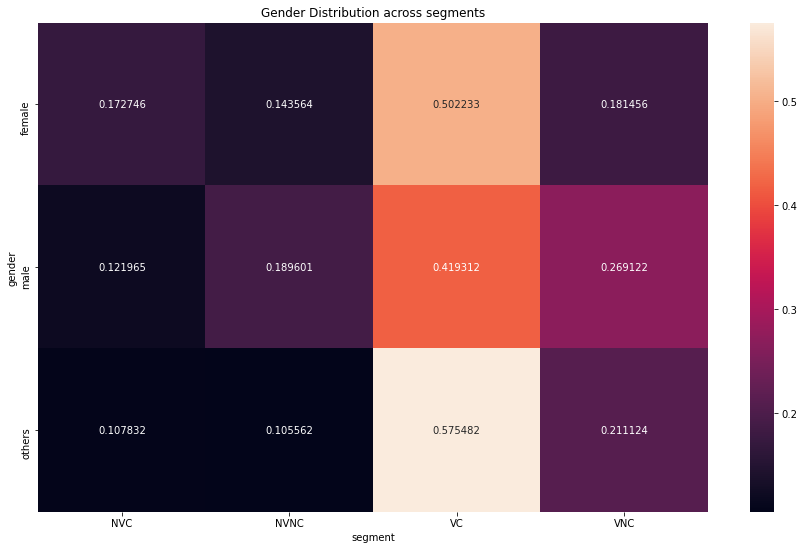

In [80]:
counts = eda_data.groupby(
    ['segment', 'gender']).size() / eda_data.groupby(['gender']).size()

counts = counts.reset_index(name='percentage')

counts = counts.pivot(
    index='gender', columns='segment', values='percentage')

plt.figure(figsize=(15, 9))
sb.heatmap(counts, annot=True, fmt='g')
plt.title('Gender Distribution across segments')

There are more females than males who completed the offers than others and there are more males who didn't completed offer but females completed the offer whether viewed or not.

### Multivariate Exploration

#### *Total spent vs RFM vs Segment*

(-10.0, 200.0)

<Figure size 1080x720 with 0 Axes>

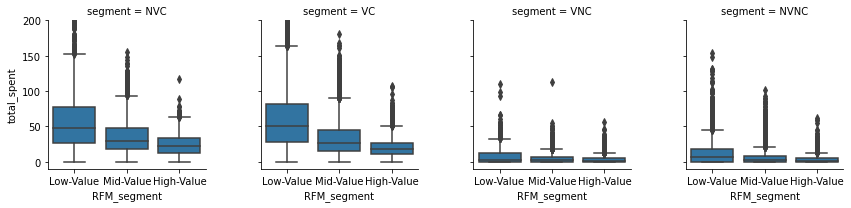

In [81]:
fig = plt.figure(figsize=(15, 10))

g = sb.FacetGrid(data=eda_data, col='segment')

g.map(sb.boxplot, 'RFM_segment', 'total_spent', order=[
      'Low-Value', 'Mid-Value', 'High-Value']).fig.subplots_adjust(wspace=.35)

plt.ylim((-10, 200))

In [82]:
eda_data.groupby(['segment', 'RFM_segment'])['total_spent'].describe()

count       mean        std   min      25%     50%  \
segment RFM_segment                                                         
NVC     Low-Value     4840.0  68.447095  95.896093  0.38  27.3250  47.780   
        Mid-Value     3698.0  35.567458  23.660242  0.18  18.2300  29.575   
        High-Value     744.0  25.147742  16.011918  0.44  13.0275  22.035   
NVNC    Low-Value     3006.0  15.179278  46.594018  0.00   0.0000   6.140   
        Mid-Value     5462.0   6.518261  10.310319  0.00   0.0000   2.795   
        High-Value    2549.0   3.909078   6.308707  0.00   0.0000   1.610   
VC      Low-Value    16279.0  69.594645  90.646925  0.11  28.0100  50.750   
        Mid-Value    10971.0  33.440329  24.179875  0.05  15.9350  26.990   
        High-Value    2379.0  21.295851  14.375967  0.08  11.4100  18.710   
VNC     Low-Value     3446.0   7.738111  14.337989  0.00   0.0000   3.150   
        Mid-Value     7455.0   4.723787   6.690261  0.00   0.0000   2.050   
        High-Value    4191.0   3.213882   5.165076  0.00   0.0000   0.570   

                         75%      max  
segment RFM_segment                    
NVC     Low-Value    77.2675  1042.52  
        Mid-Value    48.4475   155.01  
        High-Value   33.0475   116.85  
NVNC    Low-Value    17.9375  1062.28  
        Mid-Value     8.4100   101.83  
        High-Value    5.1700    62.23  
VC      Low-Value    82.4650  1200.99  
        Mid-Value    45.5950   295.07  
        High-Value   27.3100   107.88  
VNC     Low-Value    13.1775   604.55  
        Mid-Value     7.3250   113.46  
        High-Value    4.7700    55.74

#### *Age vs RFM vs Segment*

<Figure size 720x720 with 0 Axes>

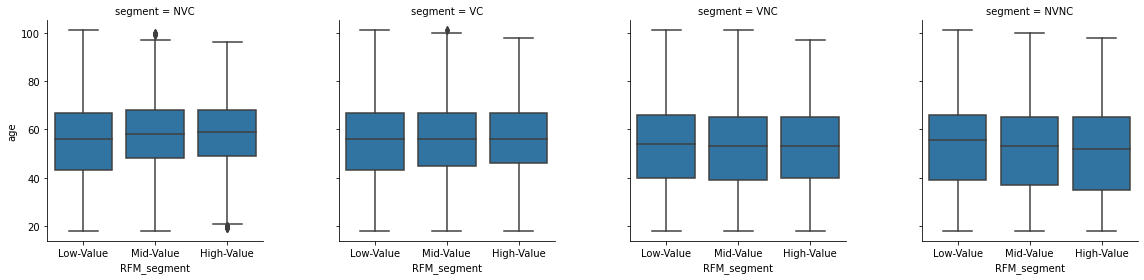

In [83]:
fig = plt.figure(figsize=(10, 10))

g = sb.FacetGrid(data=eda_data, col='segment', height=4)

g.map(sb.boxplot, 'RFM_segment', 'age', order=[
      'Low-Value', 'Mid-Value', 'High-Value']).fig.subplots_adjust(wspace=.35)

In [84]:
eda_data.groupby(['segment', 'RFM_segment'])['age'].describe()

count       mean        std   min    25%   50%   75%  \
segment RFM_segment                                                           
NVC     Low-Value     4840.0  55.034917  17.481376  18.0  43.00  56.0  67.0   
        Mid-Value     3698.0  56.852353  16.836188  18.0  48.00  58.0  68.0   
        High-Value     744.0  57.583333  15.932683  19.0  49.00  59.0  68.0   
NVNC    Low-Value     3006.0  53.976048  18.153389  18.0  39.25  55.5  66.0   
        Mid-Value     5462.0  51.945990  18.409387  18.0  37.00  53.0  65.0   
        High-Value    2549.0  51.293841  18.611695  18.0  35.00  52.0  65.0   
VC      Low-Value    16279.0  54.998341  17.002394  18.0  43.00  56.0  67.0   
        Mid-Value    10971.0  55.740224  16.766795  18.0  45.00  56.0  67.0   
        High-Value    2379.0  56.134510  16.009393  18.0  46.00  56.0  67.0   
VNC     Low-Value     3446.0  53.154672  17.675732  18.0  40.00  54.0  66.0   
        Mid-Value     7455.0  52.311871  17.886526  18.0  39.00  53.0  65.0   
        High-Value    4191.0  52.346218  17.735626  18.0  40.00  53.0  65.0   

                       max  
segment RFM_segment         
NVC     Low-Value    101.0  
        Mid-Value    100.0  
        High-Value    96.0  
NVNC    Low-Value    101.0  
        Mid-Value    100.0  
        High-Value    98.0  
VC      Low-Value    101.0  
        Mid-Value    101.0  
        High-Value    98.0  
VNC     Low-Value    101.0  
        Mid-Value    101.0  
        High-Value    97.0

#### *Income vs RFM vs Segment*

<Figure size 720x720 with 0 Axes>

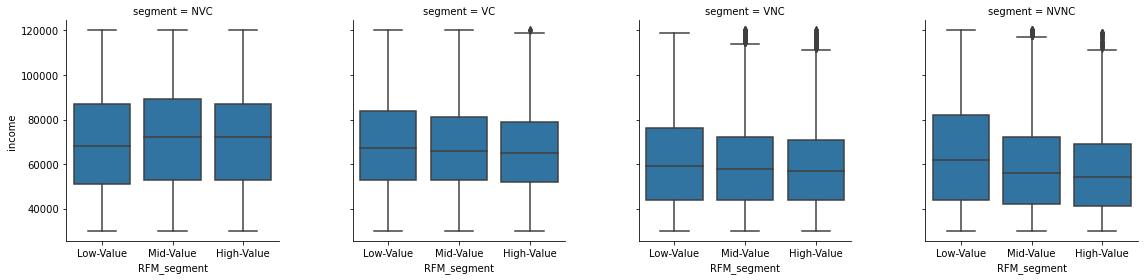

In [85]:
fig = plt.figure(figsize=(10, 10))

g = sb.FacetGrid(data=eda_data, col='segment', height=4)

g.map(sb.boxplot, 'RFM_segment', 'income', order=[
      'Low-Value', 'Mid-Value', 'High-Value']).fig.subplots_adjust(wspace=.35)

In [86]:
eda_data.groupby(['segment', 'RFM_segment'])['income'].describe()

count          mean           std      min      25%  \
segment RFM_segment                                                          
NVC     Low-Value     4840.0  69272.727273  23144.835399  30000.0  51000.0   
        Mid-Value     3698.0  71702.271498  22936.678254  30000.0  53000.0   
        High-Value     744.0  70712.365591  22406.691411  30000.0  53000.0   
NVNC    Low-Value     3006.0  65300.066534  24507.646537  30000.0  44000.0   
        Mid-Value     5462.0  59456.426218  21146.367472  30000.0  42000.0   
        High-Value    2549.0  56647.704982  19325.535192  30000.0  41000.0   
VC      Low-Value    16279.0  68390.441673  21374.751048  30000.0  53000.0   
        Mid-Value    10971.0  67328.320117  20431.755788  30000.0  53000.0   
        High-Value    2379.0  66251.786465  20168.780886  30000.0  52000.0   
VNC     Low-Value     3446.0  62288.160186  21814.981716  30000.0  44000.0   
        Mid-Value     7455.0  60049.899396  19970.663477  30000.0  44000.0   
        High-Value    4191.0  59078.501551  18756.390624  30000.0  44000.0   

                         50%      75%       max  
segment RFM_segment                              
NVC     Low-Value    68000.0  87000.0  120000.0  
        Mid-Value    72000.0  89000.0  120000.0  
        High-Value   72000.0  87000.0  120000.0  
NVNC    Low-Value    62000.0  82000.0  120000.0  
        Mid-Value    56000.0  72000.0  120000.0  
        High-Value   54000.0  69000.0  119000.0  
VC      Low-Value    67000.0  84000.0  120000.0  
        Mid-Value    66000.0  81000.0  120000.0  
        High-Value   65000.0  79000.0  120000.0  
VNC     Low-Value    59000.0  76000.0  119000.0  
        Mid-Value    58000.0  72000.0  120000.0  
        High-Value   57000.0  71000.0  120000.0

#### *Gender vs RFM vs Segment*

<Figure size 720x720 with 0 Axes>

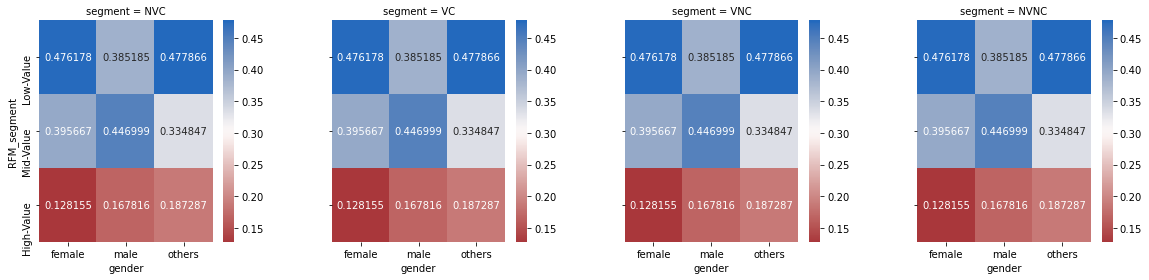

In [87]:
def heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    index = args[1]
    columns = args[0]
    counts = eda_data.groupby([columns, index]).size(
    ) / eda_data.groupby([columns]).size()
    counts = counts.reset_index(name='count')
    counts = counts.pivot(index=index, columns=columns, values='count')
    sb.heatmap(counts, annot=True, fmt='g', **kwargs)


fig = plt.figure(figsize=(10, 10))
g = sb.FacetGrid(data=eda_data, col='segment', height=4)

g.map_dataframe(heatmap, 'gender', 'RFM_segment',
                cmap='vlag_r').fig.subplots_adjust(wspace=.35)

### Feature Engineering

**Converting Categorical columns into dummy variables.**

In [88]:
# gender and RFM_segment
categorical_columns_to_handle = ['gender', 'RFM_segment']
final_customer_transaction_data
final_customer_transaction_data_categorical = pd.get_dummies(
    data=final_customer_transaction_data, columns=categorical_columns_to_handle)

final_customer_transaction_data_categorical.sample(5)

,customer_id,time_received,offer_id,reward,age,became_member_on,income,difficulty,duration,offer_type,...,revenue_cluster,frequency,frequency_cluster,overall_score,gender_female,gender_male,gender_others,RFM_segment_Low-Value,RFM_segment_Mid-Value,RFM_segment_High-Value
64264,fcbf38029321416f9e0c593b59c8ada7,0,fafdcd668e3743c1bb461111dcafc2a4,2.0,29,2018-06-30,61000.0,10.0,10.0,discount,...,2,18,1,6,1,0,0,1,0,0
55209,d964396514904cae974ae72f6bd4c606,21,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,64,2013-10-15,90000.0,5.0,7.0,bogo,...,2,8,3,7,0,1,0,1,0,0
9207,257ea016615b44b9ba7caca046d0261a,24,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,35,2018-04-13,54000.0,10.0,5.0,bogo,...,3,8,3,10,1,0,0,0,1,0
46658,b612b3c9e4474994a1be321b637cf773,0,5a8bc65990b245e5a138643cd4eb9837,0.0,80,2016-12-03,89000.0,0.0,3.0,informational,...,3,5,3,9,0,1,0,0,1,0
785,0345b2da6507473ca4400ed84dc6725a,21,3f207df678b143eea3cee63160fa8bed,0.0,70,2017-10-26,31000.0,0.0,4.0,informational,...,4,13,1,8,1,0,0,1,0,0


In [89]:
# mapping segment
# Converting VC = TR (Treatment Responders)
# Converting VNC = TN (Treatment Not Responders)
# Converting NVC = CR (Control Responders)
# Converting NVNC = CN (Control Non Responders)
segment_dict = {'VC':'TR', 'VNC' : 'TN', 'NVC' : 'CR', 'NVNC' : 'CN'}
final_customer_transaction_data_categorical.segment.replace(segment_dict, inplace = True)

segment_dict = {'TR': 0, 'TN': 1, 'CR': 2, 'CN': 3}

final_customer_transaction_data_categorical.segment.replace(
    segment_dict, inplace=True)

final_customer_transaction_data_categorical.sample(5)

,customer_id,time_received,offer_id,reward,age,became_member_on,income,difficulty,duration,offer_type,...,revenue_cluster,frequency,frequency_cluster,overall_score,gender_female,gender_male,gender_others,RFM_segment_Low-Value,RFM_segment_Mid-Value,RFM_segment_High-Value
27467,6c3eb0c4198c49aaa109a3bc4bb0acbe,24,ae264e3637204a6fb9bb56bc8210ddfd,0.0,72,2017-02-02,62000.0,10.0,7.0,bogo,...,3,8,3,10,0,1,0,0,1,0
60859,ef8ac744e256441588fba9417a997376,0,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,70,2016-11-18,46000.0,7.0,7.0,discount,...,4,26,0,8,1,0,0,1,0,0
2110,08954e2b550f423a98b664ace2d26c7f,24,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,52,2018-06-05,74000.0,10.0,5.0,bogo,...,4,4,4,11,0,1,0,0,0,1
64529,fdea2f3817d74cd9a4b2ce819e62c824,21,fafdcd668e3743c1bb461111dcafc2a4,2.0,38,2018-07-09,89000.0,10.0,10.0,discount,...,3,6,3,10,0,1,0,0,1,0
61203,f09de4c8c9a04232ae23b203cdfecc47,24,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,64,2015-11-01,40000.0,7.0,7.0,discount,...,4,14,1,9,0,1,0,0,1,0


In [90]:
final_customer_transaction_data_categorical.segment.sample(5)

59315    0
38494    3
3162     3
48511    0
47864    1
Name: segment, dtype: int64

In [91]:
final_customer_transaction_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65020 entries, 0 to 65019
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  65020 non-null  object        
 1   time_received                65020 non-null  int64         
 2   offer_id                     65020 non-null  object        
 3   reward                       65020 non-null  float64       
 4   age                          65020 non-null  int64         
 5   became_member_on             65020 non-null  datetime64[ns]
 6   income                       65020 non-null  float64       
 7   difficulty                   65020 non-null  float64       
 8   duration                     65020 non-null  float64       
 9   offer_type                   65020 non-null  object        
 10  email                        65020 non-null  float64       
 11  mobile                       65020 non-nu

#### Exporting Final Data to machine.

In [92]:
final_customer_transaction_data_categorical.to_csv(
    'data/customer_transaction_data_categorical.csv', index=None, header=True)